Pertemuan kali ini akan membahas tentang kasus dalam _cleansing data_. Pertemuan ini membahas secara kasus tentang pembersihan data, seperti:
* Mengatasi _missing value_
* Mengatasi inkonsistensi data
* _Scaling_ dan _normalization_

## Penganganan _Missing value_
* _Missing value_ didefinisikan sebagai nilai yang hilang pada sebuah _instance_ pada atribut tertentu
* Artinya, _missing value_ pada data terletak pada beberapa persilangan baris dan kolom
* _Missing value_ terjadi karena beberapa sebab:
 * Data memang tidak direkam (_unrecorded_)
 * Data memang tidak ada (_unavailable_)
* Penyebab _missing value_ penting untuk diketahui untuk penanganan _missing value_

In [7]:
import pandas as pd

# Import data pertama
data = pd.read_csv('/content/drive/MyDrive/handson/Feature Engineering for Machine Learning/property_data.csv')
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0




<img src="https://drive.google.com/uc?export=view&id=1x3VFpcqjikPNtCX-24505AI3W-z_H04b" alt="Drawing" width= 500px;/>

In [4]:
# Import data kedua
data2 = pd.read_csv('/content/drive/MyDrive/handson/Feature Engineering for Machine Learning/Building_Permits.csv')
data2.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [13]:
data2['TIDF Compliance']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
24073   NaN
24074   NaN
24075   NaN
24076   NaN
24077   NaN
Name: TIDF Compliance, Length: 24078, dtype: float64

In [8]:
data.isnull()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,True,False,False


In [9]:
data.isnull().sum()

lai             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

In [10]:
data2.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                      23814
Street Name                                   0
Street Suffix                               265
Unit                                      20252
Unit Suffix                               23811
Description                                  24
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                2656
Completed Date                            14228
First Construction Document Date           2655
Structural Notification                   23329
Number of Existing Stories              

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
NUM_BEDROOMS,3,0.333333
ST_NUM,2,0.222222
SQ_FT,2,0.222222
lai,1,0.111111
OWN_OCCUPIED,1,0.111111
NUM_BATH,1,0.111111
ST_NAME,0,0.000000


In [12]:
total2 = data2.isnull().sum().sort_values(ascending=False)
percent2 = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(10)

,Total,Percent
TIDF Compliance,24078,1.000000
Voluntary Soft-Story Retrofit,24071,0.999709
Street Number Suffix,23814,0.989036
Unit Suffix,23811,0.988911
Site Permit,23578,0.979234
Structural Notification,23329,0.968893
Fire Only Permit,21791,0.905017
Unit,20252,0.841100
Completed Date,14228,0.590913
Permit Expiration Date,6463,0.268419


---
## Mencari Tahu Data yang hilang/tidak ada

* Pada tahap ini, kita masuk ke tahap yang membutuhkan "Intuisi".
* Kita perlu memahami data lebih lanjut lagi. Dalam artian:
    * Berusaha memahami arti tiap-tiap fitur.
    * Memahami "Kenapa begini" dan "Kenapa begitu".
* Maka dari itu seringkali dibutuhkan _Domain Knowledge_ dalam tahap ini.
* Untuk memahami data awal, juga seringkali digunakan bantuan visualisasi.
---
* Seringkali, untuk membantu kita menganalisa hal ini. Salah satu pertanyaan yang dapat membantu adalah:
    * Apakah data yang tidak ada dikarenakan tidak terekam atau memang tidak ada


In [ ]:
data2.loc[:,('Street Number Suffix','Zipcode')]

,Street Number Suffix,Zipcode
0,NaN,94102.0
1,NaN,94102.0
2,NaN,94109.0
3,NaN,94109.0
4,NaN,94102.0
...,...,...
24073,NaN,94127.0
24074,NaN,94122.0
24075,NaN,94114.0
24076,NaN,94107.0


In [ ]:
data2['Street Number Suffix'].unique()

array([nan, 'A', 'C', 'V', 'B', 'E', 'D', 'R', 'F'], dtype=object)

In [ ]:
total = data2[['Street Number Suffix','Zipcode']].isnull().sum().sort_values(ascending=False)
percent = (data2[['Street Number Suffix','Zipcode']].isnull().sum()/data2[['Street Number Suffix','Zipcode']].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Street Number Suffix,23814,0.989036
Zipcode,121,0.005025


* Dari intuisi anda mengapa datanya bisa seperti itu?
* Note: Street number suffix adalah akhiran dari nomor bangunan, Misal: Ellis Avenue 140 A. "A" adalah street number suffix.

---
## Drop NaN
* Jika anda terburu-buru, atau tidak ada alasan mengapa data tersebut tidak ada. Salah satu opsi yang dapat dilakukan adalah untuk menghapus baris/kolom yang memiliki data yang hilang.
* Namun, anda perlu benar-benar berhati-hati jika menghapus kolom/baris. Karena bisa saja fitur tersebut penting.


In [ ]:
data.dropna()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0


In [ ]:
data.dropna(axis=1)

,ST_NAME
0,PUTNAM
1,LEXINGTON
2,LEXINGTON
3,BERKELEY
4,BERKELEY
5,BERKELEY
6,WASHINGTON
7,TREMONT
8,TREMONT


In [ ]:
# Hapus Baris

In [ ]:
# Hapus Kolom

---
## Simple Imputation
* Selain menghapus baris atau kolom, kita dapat mempertimbangkan untuk mengubah nilai yang _missing_ tersebut.
* Untuk mengganti _missing value_, kita harus mengerti atau memperkirakan kenapa data tersebut hilang
* Apabila penyebab _missing value_-nya karena datanya memang tidak ada (_unavailable_), maka bisa di-_replace_ dengan nilai 0.


In [ ]:
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
data['NUM_BATH'] = data['NUM_BATH'].fillna(0)
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,0,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


* Dapat dilihat _missing value_ pada kolom `NUM_BATH` menjadi 0.


* Data yang _missing_ karena tidak terekam (_unrecorded_), nilainya dapat diganti dengan
 * Nilai tengahnya (_mean_, _mode_ atau _median_)
 * Nilai sebelumnya (disebut sebagai _front filling_)
 * Nilai sesudahnya (disebut sebagai _back filling_)
 
 
* Mengganti nilai dengan nilai tengahnya dapat digunakan dengan bantuan _Numpy_ dengan `np.mean` atau `np.median`, atau langsung menggunakan _method_ dari Pandas
* Sebagai contoh:
 * Kolom `lai` dengan _mean_
 * Kolom `SQ_FT` dengan _median_
 * Kolom `OWN_OCCUPIED` dengan _mode_

In [ ]:
data['lai'] = data['lai'].fillna( data['lai'].mean() )

data['SQ_FT'] = data['SQ_FT'].fillna( data['SQ_FT'].median() )

data['OWN_OCCUPIED'] = data['OWN_OCCUPIED'].fillna( data['OWN_OCCUPIED'].mode()[0] )

data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,950.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,950.0
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


* Metode _front filling_ adalah metode untuk mengisi _missing value_ suatu _cell_ berdasarkan nilai _cell_ di atasnya (sebelumnya)
* Sebagai contoh, pada kolom `ST_NUM` _index_ ke-2, akan digantikan dengan 197.0 (nilai _index_ ke-1). Begitu pula untuk _index_ ke-6 akan diganti dengan nilai pada _index_ ke-5 yaitu 207.0
* Hal ini dilakukan dengan menggunakan parameter `method='ffill'`

In [14]:
data['NUM_BEDROOMS'] = data['NUM_BEDROOMS'].fillna(method='ffill')
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,1.0,2,1800.0


* Sedangkan _back filling_ adalah proses mengisi nilai kosong  nilai pada cell dibawahnya (_index_ sesudahnya)
* Hal ini dilakukan dengan `method='bfill'` sebagai parameter dalam `fillna`
* Sebagai contoh, pada kolom `NUM_BEDROOMS` pada _index_ ke-2 dan ke-5 digantikan masing-masing dengan nilai pada _index_ ke-3 dan ke-6.
* Pelu diperhatikan bahwa _index_ ke-8 tidak di-_replace_, karena merupakan _index_ terakhir dan tidak ada nilai sesudahnya.

In [ ]:
data['NUM_BEDROOMS'] = data['NUM_BEDROOMS'].fillna(method='bfill')
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,950.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1,800.0
6,100007000.0,207.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,950.0
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


* Namun, yang kita lihat, setelah menggunakan `bfill` dan `ffill` masih ada beberapa data NaN
* Untuk menghindari hal ini dapat ditambahkan `.fillna()` lagi setelah `.fillna()` yang pertama.

In [ ]:
data['NUM_BEDROOMS'] = data['NUM_BEDROOMS'].fillna(method='bfill').fillna(0)
data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,950.0
2,100003000.0,197.0,LEXINGTON,N,1.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.0,1,800.0
6,100007000.0,207.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,950.0
8,100009000.0,215.0,TREMONT,Y,0.0,2,1800.0


* Proses meng-_handle missing value_ sendiri adalah proses bisnis, sehingga tidak ada cara pastinya.
* Meng-_handle missing value_ pada tiap data dan kolom akan berbeda, tergantung dari kasusnya.

### LATIHAN

In [ ]:
# Sekarang, cobalah pada data 2, lakukan imputation dengan menggunakan `bfill`. Jika ada data yang masih kosong, isilah dengan nilai 0

## Penanganan Inkonsistensi Data
* Inkonsistensi data yang dimaksud dalam pembahasan ini adalah data pada kolom yang sama dan memiliki makna yang sama, tetapi memiliki _entry_ yang berbeda
* Sebagai contoh, terdapat kolom yang berisikan nama-nama provinsi. Untuk DKI Jakarta, dapat saja ditulis sebagai DKI Jakarta, atau hanya Jakarta saja
* Inkonsisten data juga bisa terjadi karena terdapat _multiple entry_ pada satu data
* Sebagai contoh, kolom provinsi yang seharusnya berisi "DKI, Jakarta" tetapi berisi "Jakarta Barat, DKI Jakarta" atau bentuk lainnya.
* Hal seperti ini akan mengganggu proses yang akan dilakukan ke dalam data tersebut
* Oleh karena itu, perlu dilakukan _handling_ untuk mengatasi permasalahan ini

* Mula-mula kita _load_ sampel data yang akan digunakan

In [16]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/handson/Feature Engineering for Machine Learning/BL-Flickr-Images-Book.csv')
data.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [ ]:
data['Place of Publication'].unique()

array(['London', 'London; Virtue & Yorston',
       'pp. 40. G. Bryan & Co: Oxford, 1898', ...,
       'pp. viii. 64. J. Debrett: London, 1789', 'G. Eld: London, 1608',
       'Newcastle upon Tyne'], dtype=object)

---
## Membuang Kolom
* Sebelum kita masuk ke kasus pembersihan yang lebih lanjut, kita akan lihat jumlah data yang hilang.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Corporate Author,8287,1.000000
Corporate Contributors,8287,1.000000
Engraver,8287,1.000000
Former owner,8286,0.999879
Edition Statement,7514,0.906721
Publisher,4195,0.506215
Author,1778,0.214553
Date of Publication,181,0.021841
Identifier,0,0.000000
Place of Publication,0,0.000000


* Beberapa data tersebut terdapat seluruhnya yang kosong. Dan juga ada beberapa yang sebagian besar kosong.
* Selain itu juga, mungkin dari hasil penilaian pribadi yang dapat mengacu pada deskripsi / domain knowledge beberapa kolom tersebut tidak dibutuhkan.
* Misal `Shelfmarks` mungkin datanya lengkap, dan mungkin berguna untuk manajemen buku di perpustakaan.
* Namun, `Shelfmarks` tidak terlalu deskriptif untuk buku tersebut. Sehingga akan kita buang.
* Sekali lagi, proses penghapusan kolom ini ditekankan pada penilaian pribadi.

In [ ]:
to_drop = ['Edition Statement', 'Corporate Author', 'Corporate Contributors',
           'Former owner', 'Engraver', 'Contributors', 'Issuance type', 'Shelfmarks']

data.drop(columns=to_drop, inplace=True)
data.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


* Setelah itu, kita melihat bahwa tabel tersebut terdapat kolom Identifier.
* Kita akan mengecek apakah kolom ini unik atau tidak. Jika unik, maka kita dapat set kolom tersebut sebagai index.

In [ ]:
data['Identifier'].is_unique

True

In [ ]:
data.set_index('Identifier', inplace=True)
data.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


---
## Inkonsistensi Penulisan
* Dari data tersebut kita melihat banyak data yang cukup kotor.
* Misal, pada `Place of Publication` ada nilai `London;Virtue&Yorston`. Pada tahun penerbitan ada `1879[1878]`. Lalu pada Judul ada beberapa nilai yang memiliki `[A novel.]`
* Namun untuk materi ini, kita hanya melihat kolom `Place of Publication` dan `Date of Publication`

In [17]:
data['Date of Publication'].unique()

array(['1879 [1878]', '1868', '1869', ..., '1831, 32', '[1806]-22',
       '1834-43'], dtype=object)

In [18]:
data['Place of Publication'].unique()

array(['London', 'London; Virtue & Yorston',
       'pp. 40. G. Bryan & Co: Oxford, 1898', ...,
       'pp. viii. 64. J. Debrett: London, 1789', 'G. Eld: London, 1608',
       'Newcastle upon Tyne'], dtype=object)

In [ ]:
data = data[['Place of Publication', 'Date of Publication']]
data.head(10)

,Place of Publication,Date of Publication
Identifier,,
206,London,1879 [1878]
216,London,1868
218,London,1869
472,London,1851
480,London,1857
481,London,1875
519,London,1872
667,Oxford,NaN
874,London,1676


* Dapat dilihat pada data di atas bahwa terdapat inkonsistensi nilai terjadi
 * Pada kolom `Place of Publication`, di mana terdapat informasi lain selain lokasi dalam satu _entry_
 * Pada kolom `Date of Publication` di mana terdapat dua tahun dalam satu _entry_
 
* Untuk permasalahan pertama pada kolom `Place of Publication`, mari asumsikan bahwa kota yang ada hanyalah London, Oxford, dan Newcastle
* Salah satu fitur yang kita dapat gunakan adalah `str.contains` dari _Series_
* _Method_ ini mengembalikan nilai _boolean_ dari Series
 * _True_ bila memang baris dalam _Series_ memiliki _string_ yang ditentukan
 * _False_ bila baris dalam _Series_ tidak memiliki _string_ yang ditentukan

In [ ]:
data['Place of Publication']

Identifier
206           London
216           London
218           London
472           London
480           London
             ...    
4158088       London
4158128        Other
4159563       London
4159587    Newcastle
4160339       London
Name: Place of Publication, Length: 8287, dtype: object

In [ ]:
data['Place of Publication'].str.contains('London')

Identifier
206         True
216         True
218         True
472         True
480         True
           ...  
4158088     True
4158128    False
4159563     True
4159587    False
4160339     True
Name: Place of Publication, Length: 8287, dtype: bool

* Cara ini kita dapat kombinasikan dengan `np.where`
* `np.where` menerima 3 buah parameter
 * Operasi logika _boolean_
 * Output bila operasi tersebut bernilai _True_
 * Output bila operasi tersebut bernilai _False_

In [20]:
import numpy as np
np.where(data['Place of Publication'].str.contains('London'), 'London', 'Other')

array(['London', 'London', 'London', ..., 'London', 'Other', 'London'],
      dtype='<U6')

* Secara verbal, contoh di atas berarti __apabila suatu baris mengandung kata 'London', maka gunakan kata 'London', selain itu gunakan kata 'Other'__
* Nilai _return_ dari _method_ `np.where` adalah _array_, bukan _Series_
* `np.where` bisa dikombinasikan dengan `np.where` lainnya sebagai tambahan kondisi pada parameter ketiga
* Hal ini menyebabkan akan adanya _nested condition_

In [ ]:
np.where(data['Place of Publication'].str.contains('London'), 'London',
         np.where(data['Place of Publication'].str.contains('Oxford'), 'Oxford',
                  np.where(data['Place of Publication'].str.contains('Newcastle'), 'Newcastle', 'Other')))

array(['London', 'London', 'London', ..., 'London', 'Newcastle', 'London'],
      dtype='<U9')

* Hasil dari `np.where` dapat digunakan dalam _DataFrame_

In [21]:
data.loc[:,'Place of Publication'] = np.where(data['Place of Publication'].str.contains('London'), 'London',
                                        np.where(data['Place of Publication'].str.contains('Oxford'), 'Oxford',
                                                 np.where(data['Place of Publication'].str.contains('Newcastle'), 'Newcastle', 'Other')))
data.head(10)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,"Fourth edition, revised, etc.",London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
6,519,NaN,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.","ASHLEY, Florence Emily.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12637.e.3.
7,667,NaN,Oxford,NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.","ANDREWS, J. - Writer of Verse",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 011652.g.73.
8,874,NaN,London,1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,"ADAMS, Mary.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11645.bb.42.
9,1143,NaN,London,1679,NaN,A Satyr against Vertue. (A poem: supposed to b...,"A., T.","OLDHAM, John.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11602.ee.10.(2.)


In [22]:
data['Place of Publication'].unique()

array(['London', 'Oxford', 'Other', 'Newcastle'], dtype=object)

* Pada kasus kedua pada kolom `Date of Publication`, dapat dilihat bahwa terdapat banyak tahun yang tidak sesuai format seperti data di bawah ini

In [ ]:
data

,Place of Publication,Date of Publication
Identifier,,
206,London,1879 [1878]
216,London,1868
218,London,1869
472,London,1851
480,London,1857
...,...,...
4158088,London,1838
4158128,Other,"1831, 32"
4159563,London,[1806]-22


* Pada data ini, setelah kita teliti lebih lanjut (misalkan). Ternyata yang merupakan tahun asli adalah 4 digit pertama dari tiap baris
* Sehingga, kita ingin mendapatkan 4 digit pertama saja.
* Untuk code murni dalam Python, berikut adalah code penulis:

In [ ]:
year_clean = []
for yr in data['Date of Publication']:
    res = ''.join([i for i in str(yr).split() if i.isdigit()])
    year_clean.append(res[:4])

year_clean[:10]

['1879', '1868', '1869', '1851', '1857', '1875', '1872', '', '1676', '1679']

* Apakah ada yang memiliki ide lain?

### Menggunakan Regex
* Salah satu cara lain yang cukup elegan adalah dengan menggunakan _regular expression_ (Regex).
* _Regular expression_ digunakan dengan pola `r'^(\d{4})'`
* Pola `r'^(\d{4})'` artinya mengambil 4 digit yang paling awal (ditandai dengan tanda ^)
* Dalam _Series_, untuk mengambil _string_ berdasarkan _regular experssion_, dapat menggunakan `str.extract`

In [ ]:
data['Date of Publication'] = data['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
data.head(10)

,Place of Publication,Date of Publication
Identifier,,
206,London,1879
216,London,1868
218,London,1869
472,London,1851
480,London,1857
481,London,1875
519,London,1872
667,Oxford,NaN
874,London,1676


* Parameter `str.extract` menerima parameter tambahan selain pola _regex_ itu sendiri, yaitu `expand`
 * Bila bernilai _True_, maka _return_-nya berupa _DataFrame_ (nilai _default_)
 * Bila bernilai _False_, maka _return_-nya berupa _Series_

# _Scaling_ dan _Normalization_
* _Scaling_ dan _normalization_ adalah proses mentransformasikan suatu data numerik ke dalam nilai lain yang representatif
* Baik _scaling_ maupun _normalization_ bertujuan agar data lebih memiliki properti spesifik yang lebih membantu dibandingkan bentuk awalnya

### _Scaling_
* _Scaling_ berarti mentransformasikan suatu data ke dalam suatu skala yang telah ditentukan
* Diberi suatu contoh data pada kolom seperti di bawah ini, dengan kolom `windspeed`

In [6]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/handson/Feature Engineering for Machine Learning/bikesharing.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data['windspeed']

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

* Apabila divisualkan dengan histogram, dapat dilihat bahwa distribusi kolom `windspeed` adalah sebagai berikut

<AxesSubplot:xlabel='windspeed'>

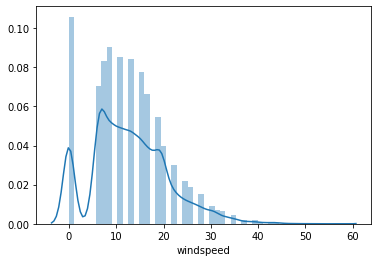

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(data['windspeed'])

* _Scaling_ melakukan transformasi tanpa mengubah distribusi dari data
* Yang berubah hanya ukuran pusat, dan ukuran persebaran dari data
* Proses _scaling_ dapat dibantu dengan `sklearn.preprocessing`
 * `MinMaxScaler` mengubah _range_ dari data dari 0 hingga 1
 * `StandardScaler` mengubah _mean_ dari data menjadi 0 dengan standar deviasi 1
* Baik _method_ `MinMaxScaler` dan `StandardScaler` adalah estimator.
 * Artinya, _method_ ini harus dipanggil dan diinisiasi dengan `fit` terlebih dahulu
 * Estimator yang sudah diinisiasi dapat melakukan transformasi dengan `transform` untuk menghasilkan data baru

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

* _Method_ ini menerima parameter berupa _DataFrame_ atau array 2 dimensi
* Perlu dicatat bahwa _scaling_ hanya dilakukan pada data yang numerik

In [ ]:
data_numeric = data.drop('datetime', axis = 1)

minmax_scaler.fit(data_numeric)
std_scaler.fit(data_numeric)

data_minmax = minmax_scaler.transform(data_numeric)
data_std = std_scaler.transform(data_numeric)

* Perlu dicatat bahwa output dari `MinMaxScaler` dan `StandardScaler` adalah _array_, bukan DataFrame
* Apabila dilihat dengan `DataFrame.describe`, maka dapat dilihat bahwa nilai minimal dan maksimal dari data yang di-_scaling_ dengan `MinMaxScaler` adalah 0 dan 1 secara berturut-turut

In [ ]:
data_minmax = pd.DataFrame(data_minmax, columns=data_numeric.columns)
data_minmax.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.502205,0.028569,0.680875,0.139476,0.483098,0.512252,0.618865,0.224563,0.098152,0.175567,0.195260
std,0.372058,0.166599,0.466159,0.211280,0.193917,0.189610,0.192450,0.143245,0.136132,0.170473,0.185599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.000000,0.326531,0.355856,0.470000,0.122840,0.010899,0.040632,0.042008
50%,0.666667,0.000000,1.000000,0.000000,0.489796,0.525338,0.620000,0.228047,0.046322,0.133183,0.147541
75%,1.000000,0.000000,1.000000,0.333333,0.632653,0.677928,0.770000,0.298225,0.133515,0.250564,0.289959
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Apabila dilihat dengan `DataFrame.describ`e, maka dapat dilihat bahwa nilai _mean_ dan standar deviasi dari data yang di-_scaling_ dengan `StandardScaler` adalah mendekati 0 dan 1 secara berturut-turut

In [ ]:
data_std = pd.DataFrame(data_std, columns=data_numeric.columns)
data_std.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04
mean,-1.253208e-16,1.958137e-17,-1.194464e-16,-1.592618e-16,3.133020e-16,-2.193114e-16,1.148774e-16,-5.221699e-17,2.088680e-17,-6.266039e-17,-6.266039e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.349864e+00,-1.714905e-01,-1.460672e+00,-6.601784e-01,-2.491372e+00,-2.701736e+00,-3.215858e+00,-1.567754e+00,-7.210421e-01,-1.029928e+00,-1.052104e+00
25%,-4.539052e-01,-1.714905e-01,-1.460672e+00,-6.601784e-01,-8.074281e-01,-8.248654e-01,-7.735577e-01,-7.101642e-01,-6.409752e-01,-7.915680e-01,-8.257554e-01
50%,4.420534e-01,-1.714905e-01,6.846162e-01,-6.601784e-01,3.454398e-02,6.902305e-02,5.899992e-03,2.432639e-02,-3.807575e-01,-2.486371e-01,-2.571223e-01
75%,1.338012e+00,-1.714905e-01,6.846162e-01,9.175828e-01,7.712696e-01,8.738177e-01,7.853577e-01,5.142603e-01,2.597782e-01,4.399583e-01,5.102564e-01
max,1.338012e+00,5.831228e+00,6.846162e-01,4.073105e+00,2.665707e+00,2.572501e+00,1.980526e+00,5.413599e+00,6.625102e+00,4.836375e+00,4.336108e+00


* Apabila kolom `windspeed` dari data normal dan data yang di-_scaling_ divisualkan, maka terlihat jelas bahwa distribusi datanya tetap sama
* Yang berbeda hanyalah _range_ baik dari sumbu X maupun Y

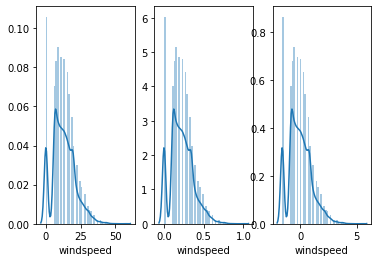

In [ ]:
fig, ax = plt.subplots(ncols=3)
sns.distplot(data['windspeed'], ax=ax[0])
sns.distplot(data_minmax['windspeed'], ax=ax[1])
sns.distplot(data_std['windspeed'], ax=ax[2])
plt.show()

* Jadi dapat dikatakan bahwa _scaling_ adalah bentuk transformasi yang tidak mengubah distribusi dari data

### _Normalization_
* Berbeda dengan _scaling_ yang mengubah data ke dalam skala tertentu, _normalization_ adalah proses mengubah data sehingga distribusinya menjadi normal
* Hal ini dilakukan dengan `sklearn.preprocessing.normalize`
* Proses inisiasi pada _method_ `Normalizer` tidak seperti pada _scaler_ sebelumnya, karena tidak menggunakan estimator
* Jadi, saat _method_ dipanggil, akan langsung mengeluarkan output data yang sudah ditransformasi

In [ ]:
from sklearn.preprocessing import normalize
data_normal = normalize(X=data_numeric, norm="l2", axis=1)

* _Method_ ini menerima 2 parameter utama
 * X, yang berisi data yang ingin ditransformasi. Dapat berupa _DataFrame_ atau array 2D
 * `norm` yang menentukan jenis normalisasinya. Berupa _string_ antara "l1", "l2", atau "max"
 * `axis` yang bernilai _default_ 1 (untuk normalisasi tiap sampel) dan 0 (untuk normalisasi tiap fitur)
* Kembalian dari method ini adalah array 2D, sehingga perlu diubah ke dalam _DataFrame_ bila dibutuhkan

In [ ]:
data_normal = pd.DataFrame(data_normal, columns=data_numeric.columns)
data_normal

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0.011703,0.0,0.000000,0.011703,0.115160,0.168469,0.947966,0.000000,0.035110,0.152143,0.187252
1,0.010338,0.0,0.000000,0.010338,0.093246,0.140955,0.827019,0.000000,0.082702,0.330807,0.413509
2,0.010880,0.0,0.000000,0.010880,0.098140,0.148353,0.870426,0.000000,0.054402,0.293769,0.348170
3,0.012691,0.0,0.000000,0.012691,0.124877,0.182684,0.951807,0.000000,0.038072,0.126908,0.164980
4,0.012983,0.0,0.000000,0.012983,0.127749,0.186884,0.973694,0.000000,0.000000,0.012983,0.012983
...,...,...,...,...,...,...,...,...,...,...,...
10881,0.008433,0.0,0.002108,0.002108,0.032845,0.041520,0.105407,0.054817,0.014757,0.693576,0.708333
10882,0.011767,0.0,0.002942,0.002942,0.043420,0.051260,0.167679,0.044130,0.029417,0.679542,0.708960
10883,0.016392,0.0,0.004098,0.004098,0.057126,0.065199,0.249976,0.061475,0.016392,0.672066,0.688458
10884,0.021459,0.0,0.005365,0.005365,0.074783,0.093479,0.327244,0.032205,0.064376,0.627664,0.692040


* Secara sepintas, dalam `DataFrame.describe` tidak ada karakteristik khusus yang terlihat

In [ ]:
data_normal.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.014850,0.000195,0.004294,0.009198,0.113721,0.134270,0.408313,0.078798,0.104321,0.471801,0.576122
std,0.012363,0.001421,0.004777,0.008244,0.079440,0.092782,0.310995,0.084958,0.095976,0.204705,0.245350
min,0.000943,0.000000,0.000000,0.000756,0.001846,0.006820,0.000000,0.000000,0.000000,0.000000,0.009492
25%,0.006079,0.000000,0.000000,0.003178,0.054836,0.064225,0.138297,0.023899,0.027524,0.375698,0.450738
50%,0.010641,0.000000,0.002775,0.006485,0.090121,0.107709,0.292097,0.053429,0.076988,0.549011,0.703040
75%,0.019688,0.000000,0.006770,0.012477,0.152622,0.181060,0.714954,0.105701,0.157194,0.628596,0.746180
max,0.083820,0.021814,0.037386,0.112159,0.551824,0.651459,0.990067,0.749052,0.546017,0.703002,0.815017


* Namun bila divisualkan, dapat dilihat bahwa distribusi dari data berubah

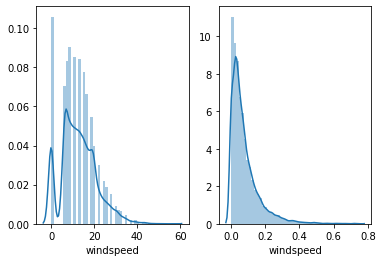

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(data['windspeed'], ax=ax[0])
sns.distplot(data_normal['windspeed'], ax=ax[1])
plt.show()

* Sehingga, dapat disimpulkan bahwa normalisasi tidak hanya merubah _range_ dan ukuran data, namun juga distribusi dari data

### _Exercise_
_Load_ `titanic.csv`. Jadikan kolom `PassengerId` sebagai _index_

In [ ]:
# jawaban anda di sini

1. Untuk tiap kolom, dapatkan presentase data yang _missing_!

In [ ]:
# jawaban anda di sini

2. Berdasarkan jawaban nomor 1, hapus kolom dengan jumlah _missing_ lebih dari 50%

In [ ]:
# jawaban anda di sini

3. Berdasarkan jawaban nomor 1, gunakan _front filling_ untuk mengisi _missing value_ pada kolom yang _missing_-nya lebih dari 15%

In [ ]:
# jawaban anda di sini

4. Berdasarkan jawaban nomor 1, gunakan modus untuk mengisi _missing value_ pada kolom yang masih memiliki _missing value_

In [ ]:
# jawaban anda di sini

5. Berdasarkan kolom `Name`, ekstrak _title_ dari namanya (Mr., Mrs., Miss.), dan kemudian ubah menjadi '_male_' dan '_female_'. Simpan nilai tersebut ke dalam kolom baru `Sex_title`, kemudian cocokkan dengan kolom `Sex`. Berapa kolom yang nilai `Sex` dan `Sex_title`-nya berbeda?

In [ ]:
# jawaban anda di sini

6. Dari kolom `Ticket`, gunakan hanya digit-digit terakhir sebagai datanya! _clue_: format _regular expression_-nya adalah `r'(\d*)$'`

In [ ]:
# jawaban anda di sini

7. Lakukan _scaling_ untuk kolom `Fare` dengan membuat _mean_-nya menjadi 0 dan standar deviasinya 1.

In [ ]:
# jawaban anda di sini